# Functions

In [2]:
cd("C:/Users/mjbarillas/Documents/GitHub/Mimosa/")

In [3]:
include("C:/Users/mjbarillas/Documents/GitHub/Mimosa/scripts/MB Ex/kPCA/TB/ex2_a_kPCA_TB_ST4SL2.jl")

objective (generic function with 1 method)

# Collect Data

In [4]:
pot, parts = 2000, 4
X, X_ = ReadData2(pot,parts)

([0.0 0.0 … 0.0 0.0; 0.00714285714286074 0.0071428571424561734 … 0.007169297987947412 0.00716929798787263; … ; -2.2587545260114674e-21 0.0017604036442076905 … -0.0007515800168585475 -1.2699970133063045e-17; -6.296278241256965e-20 0.002381344126772473 … -0.0010275736132411902 -1.3734573883152582e-17], Any[[0.0 0.0 … 0.0 0.0; 0.00714285714286074 0.0071428571424561734 … 0.007169297987947412 0.00716929798787263; … ; 0.09285714285714035 0.09281959044314798 … 0.09315959987710459 0.0932012741155299; 0.10000000000000002 0.09991752351807089 … 0.10031422110204903 0.10037061082115291], [-3.614007241618348e-20 -3.614007241618348e-20 … -3.614007241618348e-20 -3.614007241618348e-20; -1.4964248734825974e-20 -8.204906665168751e-12 … 2.412451721961751e-12 4.2266944067989587e-19; … ; -2.9363808838149076e-20 -0.0017604036442188554 … 0.0007515800168676306 -4.322973818470197e-17; -7.34095220953727e-20 -0.002381344126784803 … 0.00102757361325123 -4.8854601643102034e-17], [1.8352380523843175e-20 1.8352380523

In [5]:
conf_list = []
for i in [0,1], j in [0,1], k in [0,1], l in [0,1], m in [0,1], n in [0,1], o in [0,1], p in [0,1]
    push!(conf_list,[i,j,k,l,m,n,o,p])
end
conf_list = reduce(hcat,conf_list)

8×256 Matrix{Int64}:
 0  0  0  0  0  0  0  0  0  0  0  0  0  …  1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  0  0  0  0  0     1  1  1  1  1  1  1  1  1  1  1  1
 0  0  0  0  0  0  0  0  1  1  1  1  1     0  0  0  0  1  1  1  1  1  1  1  1
 0  0  0  0  1  1  1  1  0  0  0  0  1  …  1  1  1  1  0  0  0  0  1  1  1  1
 0  0  1  1  0  0  1  1  0  0  1  1  0     0  0  1  1  0  0  1  1  0  0  1  1
 0  1  0  1  0  1  0  1  0  1  0  1  0     0  1  0  1  0  1  0  1  0  1  0  1

In [ ]:
plotSet([133],conf_list,X_)

In [ ]:
conf = 133
conf_string = "["
for i in conf_list[:,conf]
    conf_string = conf_string * "$i"
end
conf_string = conf_string * "]"
plot(X_[1][:,conf],X_[2][:,conf],X_[3][:,conf], 
    xlims =(0.0,0.11),
    size=(1000,1000),
    xlabel ="x (m)",
    ylabel = "y (m)",
    zlabel = "z (m)",
    linewidth=4,
    label="conf = $(conf_string) @ $pot V",
    legendfontsize=18,
    guidefontsize=18,
    tickfontsize=18,
    legend=:topleft,
    camera = (45, 45),
    xticks = [0.0,0.05,0.1],
    yticks = [-round(maximum(abs.(X_[2][:,conf])),digits=3),0.0,round(maximum(abs.(X_[2][:,conf])),digits=3)],
    zticks = [-round(maximum(abs.(X_[3][:,conf])),digits=3),0.0,round(maximum(abs.(X_[3][:,conf])),digits=3)],
    ylims = (-round(maximum(abs.(X_[2][:,conf])),digits=3),round(maximum(abs.(X_[2][:,conf])),digits=3)),
    zlims = (-1.15*round(maximum(abs.(X_[3][:,conf])),digits=3),1.15*round(maximum(abs.(X_[3][:,conf])),digits=3)),
    )

In [ ]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST2SL_FOS_10000100_2kV.svg")

# Offline

In [6]:
k = 3
β = 25.477396507076456
Κ(X1,X2) = exp(-β*(dot(X1-X2,X1-X2)))
Λ, U, U_, Ḡ, G = kPOD(Κ, X, k)
Z_ = real.(U_'*Ḡ)

3×256 Matrix{Float64}:
  7.58725e-16  0.0259779   -0.0155027   …  -0.010996     1.34791e-15
 -1.95273e-15  0.0154396    0.0260154      -0.00653531  -2.23595e-15
  0.00755369   0.00673744   0.00673744      0.0102788    0.0106817

In [ ]:
# -------Curve fitting------
# Quadric surface explicit in z3 of the form z3 = A + B*z1^2 + Cz2^2 + D*z1 + E*z2
Quadric(z) = [1 z[1]^2 z[2]^2 z[1] z[2]] 

# least squares fit of the curve to the TS in the RS
A = [Quadric(Z) for Z in eachcol(Z_)]
A = reduce(vcat,A)
c = pinv(A)*Z_[3,:]

#Definition of surface and unit gradient
z3(z1,z2) = c[1] + c[2]*z1^2 + c[3]*z2^2 + c[4]*z1 + c[5]*z2
∇zᵤ(z1,z2) = (1/norm([2*c[2]*z1 + c[4], 2*c[3]*z2 + c[5], 1]))*[2*c[2]*z1 + c[4], 2*c[3]*z2 + c[5], 1]

In [ ]:
gr()

In [ ]:
wireframe(
    round(minimum(Z_[1,:]),digits=3):0.01:round(maximum(Z_[1,:]),digits=3),
    round(minimum(Z_[2,:]),digits=3):0.01:round(maximum(Z_[2,:]),digits = 3),
    z3)

In [ ]:
scatter!(eachrow(Z_)...,
xlabel="z1",ylabel="z2",zlabel="z3",
size=(1200,1200),
label = false,
grid = true, gridlinewidth = 2,
tickfontsize = 20,
guidefontsize=30,
zticks=[round(minimum(Z_[3,:]),digits=3),0.0,round(maximum(Z_[3,:]),digits=3)...],
xticks=[round(minimum(Z_[1,:]),digits=3),0.0,round(maximum(Z_[1,:]),digits=3)...],
yticks=[round(minimum(Z_[2,:]),digits=3),0.0,round(maximum(Z_[2,:]),digits=3)...],
markersize = 4
)

In [ ]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST2SL_kPCA_5kV.svg")

In [ ]:
Λ = real.(Λ)
Λ_t = sum(Λ)
Λ = (1/Λ_t)*Λ
Λ_s = round.(100*Λ[[i for i in 1:10]])
p = bar(real.(Λ_s),xlabel="λ",ylabel="%", legend=false)
display(p)

In [7]:
neighbors = 25
Y_, _ = isomap1(neighbors,Z_)


256 - 46 - %100.0


([5.134038363809294e-5 0.006293843764082915 … -0.0025010219489916387 -1.982146751556971e-5; 3.1300135646654725e-5 0.029998731082425 … -0.011571691987893476 -1.9755411392975834e-5], [0.0 0.030273355886921927 … 0.013078535229210927 0.00312804160866725; 0.030273355886921927 0.0 … 0.04316190949758478 0.030501320614623843; … ; 0.013078535229210927 0.04316190949758478 … 0.0 0.012797814264695187; 0.00312804160866725 0.030501320614623843 … 0.012797814264695187 0.0])

In [9]:
plotlyjs()

Plots.PlotlyJSBackend()

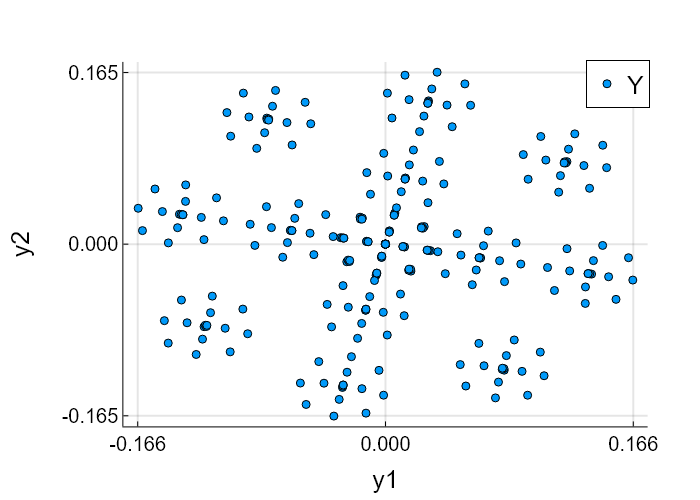

In [11]:
s = scatter(eachrow(Y_)...,
    xlabel="y1",ylabel="y2",
    markercolor = [1 for _ in 1:256], #[c[4] for c in conf],
    size=(1000,800),
    # label = false,
    grid = true, gridlinewidth = 2,
    tickfontsize = 14,
    guidefontsize=18,
    legendfontsize = 18,
    xticks=[round(minimum(Y_[1,:]),digits=3),0.0,round(maximum(Y_[1,:]),digits=3)...],
    yticks=[round(minimum(Y_[2,:]),digits=3),0.0,round(maximum(Y_[2,:]),digits=3)...],
    markersize = 4,
    label="Y",
    hover=collect(1:256)
    )

In [ ]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST2SL_isomap_5kV.svg")

In [34]:
r = 1.1*norm(Y_[:,214]-Y_[:,217])
kdtree = KDTree(Y_; leafsize = 10)
group = inrange(kdtree,Y_[:,214],r)

16-element Vector{Int64}:
 211
 219
 224
 216
 212
 209
 214
 220
 210
 222
 217
 218
 213
 221
 215
 223

In [15]:
gr()

Plots.GRBackend()

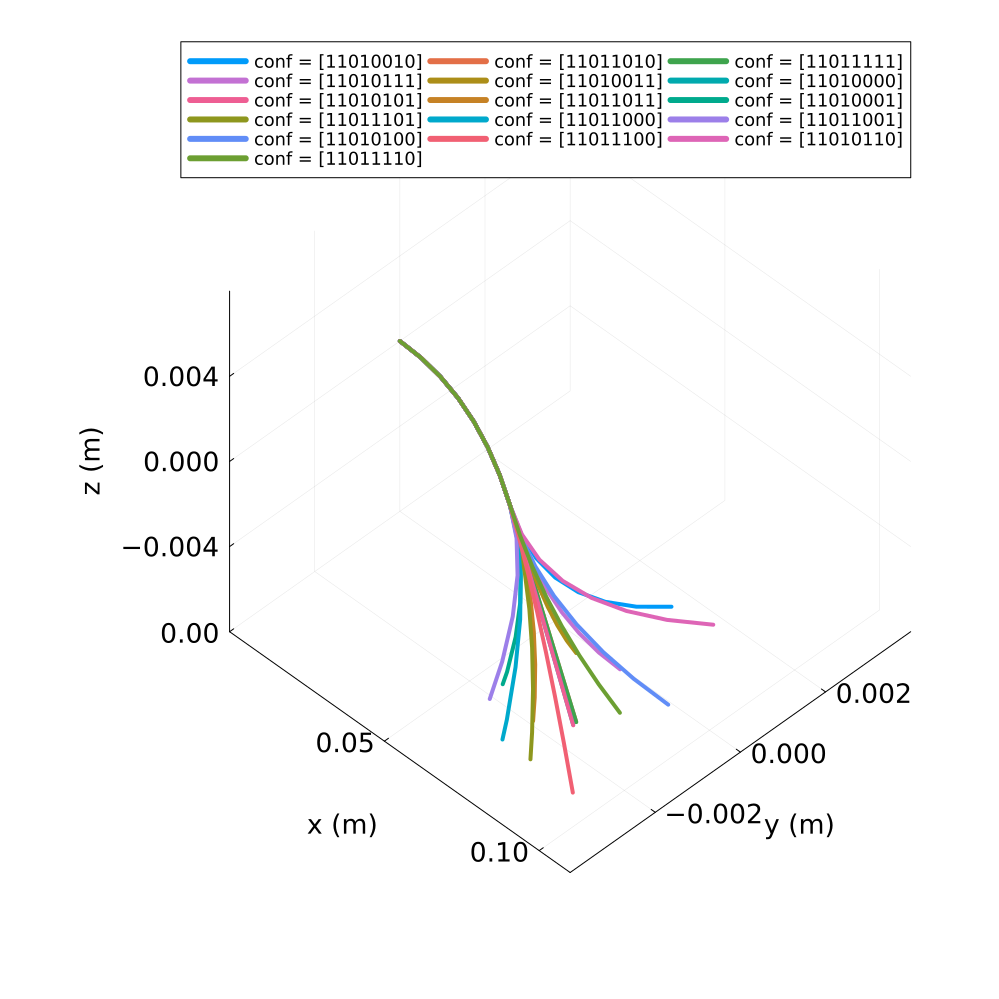

In [38]:
conf = group[1]
conf_string = "["
for i in conf_list[:,conf]
    conf_string = conf_string * "$i"
end
conf_string = conf_string * "]"
plot(X_[1][:,conf],X_[2][:,conf],X_[3][:,conf], 
    xlims =(0.0,0.11),
    size=(1000,1000),
    xlabel ="x (m)",
    ylabel = "y (m)",
    zlabel = "z (m)",
    linewidth=4,
    label="conf = $(conf_string)",
    legendfontsize=18,
    guidefontsize=18,
    tickfontsize=18,
    camera = (45, 45),
    xticks = [0.0,0.05,0.1],
    yticks = [-round(maximum(abs.(X_[2][:,conf])),digits=3),0.0,round(maximum(abs.(X_[2][:,conf])),digits=3)],
    zticks = [-round(maximum(abs.(X_[3][:,conf])),digits=3),0.0,round(maximum(abs.(X_[3][:,conf])),digits=3)],
    ylims = (-round(maximum(abs.(X_[2][:,conf])),digits=3),round(maximum(abs.(X_[2][:,conf])),digits=3)),
    zlims = (-1.15*round(maximum(abs.(X_[3][:,conf])),digits=3),1.15*round(maximum(abs.(X_[3][:,conf])),digits=3)),
    legend=:outerbottom,
    legendcolumns=3,
    )
p = nothing
for i in 2:lastindex(group)
    conf = group[i]
    conf_string = "["
    for i in conf_list[:,conf]
        conf_string = conf_string * "$i"
    end
    conf_string = conf_string * "]"
    p = plot!(X_[1][:,conf],X_[2][:,conf],X_[3][:,conf], 
        xlims =(0.0,0.11),
        size=(1000,1000),
        xlabel ="x (m)",
        ylabel = "y (m)",
        zlabel = "z (m)",
        linewidth=4,
        label="conf = $(conf_string)",
        legendfontsize=12,
        guidefontsize=18,
        tickfontsize=18,
        legend=:topleft,
        camera = (45, 45),
        xticks = [0.0,0.05,0.1],
        yticks = [-round(maximum(abs.(X_[2][:,conf])),digits=3),0.0,round(maximum(abs.(X_[2][:,conf])),digits=3)],
        zticks = [-round(maximum(abs.(X_[3][:,conf])),digits=3),0.0,round(maximum(abs.(X_[3][:,conf])),digits=3)],
        ylims = (-2*round(maximum(abs.(X_[2][:,conf])),digits=3),2*round(maximum(abs.(X_[2][:,conf])),digits=3)),
        zlims = (-2*round(maximum(abs.(X_[3][:,conf])),digits=3),2*round(maximum(abs.(X_[3][:,conf])),digits=3)),
        )
end
display(p)

In [39]:
Plots.savefig("G:/My Drive/Temp/Comunication/ROM_Paper/TB4ST2SL_cluster2.svg")

"G:\\My Drive\\Temp\\Comunication\\ROM_Paper\\TB4ST2SL_cluster2.svg"